In [37]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

# Coleta de Dados:
Selecione uma base de dados adequada para problemas de classificação. A base deve conter pelo menos uma variável alvo categórica e múltiplas variáveis independentes.

In [38]:
df = pd.read_csv('diabetes2.csv')
df

,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,50,1
1,85.0,66.0,29.0,NaN,26.6,31,0
2,183.0,64.0,NaN,NaN,23.3,32,1
3,89.0,66.0,23.0,94.0,28.1,21,0
4,137.0,40.0,35.0,168.0,43.1,33,1
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,63,0
764,122.0,70.0,27.0,NaN,36.8,27,0
765,121.0,72.0,23.0,112.0,26.2,30,0
766,126.0,60.0,NaN,NaN,30.1,47,1


# Pré-processamento de Dados:
* Elementos Faltantes: Trate os elementos faltantes na base de dados, se houver.
* Variáveis Categóricas: Converta variáveis categóricas em numéricas, se necessário.
* Normalização: Normalize as variáveis, caso seja necessário.
* Separação de Dados: Divida a base em conjuntos de treino e teste.

In [39]:
print(f"Elementos faltantes:\n{df.isna().sum()}\n") 
imputer = SimpleImputer(strategy='mean')
df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = imputer.fit_transform(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]])

print("Não há variáveis categóricas\n")

scaler = MinMaxScaler()
df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = scaler.fit_transform(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]])

domClass = df[df["Outcome"] == 0]
subClass = df[df["Outcome"] == 1]
domClass = resample(domClass, n_samples=len(subClass), random_state=0)
df = pd.concat([domClass, subClass])
df = df.sample(frac=1, random_state=0)

XTrain, XTest, yTrain, yTest = train_test_split(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]], df["Outcome"], test_size = 0.2, random_state=0)

Elementos faltantes:
Glucose             5
BloodPressure      35
Skin Thickness    227
Insulin           374
BMI                11
Age                 0
Outcome             0
dtype: int64

Não há variáveis categóricas



# Implementação e Treino:
Implemente e treine três algoritmos de classificação diferentes (por exemplo, k-NN, Árvores de Decisão e SVM).

In [40]:
modelLogistic = LogisticRegression()
modelLogistic.fit(XTrain, yTrain)

k = 5
modelKnn = KNeighborsClassifier(n_neighbors = k)
modelKnn.fit(XTrain, yTrain)

modelDT = DecisionTreeClassifier(random_state=0)
modelDT.fit(XTrain, yTrain)

DecisionTreeClassifier(random_state=0)

# Avaliação de Modelos:
* Use o conjunto de teste para fazer previsões com cada um dos modelos treinados.
* Calcule métricas de avaliação como precisão, recall e F1-score para cada modelo.

In [41]:
yPredLogistic = modelLogistic.predict(XTest)
dfComparacaoLogistic = pd.DataFrame(yTest)
dfComparacaoLogistic["Predição"] = yPredLogistic
print("Comparação - Regressão Logística")
print(dfComparacaoLogistic)
accuracyLogistic = accuracy_score(yTest, yPredLogistic) 
precisionLogistic = precision_score(yTest, yPredLogistic) 
recallLogistic = recall_score(yTest, yPredLogistic) 
f1Logistic = f1_score(yTest, yPredLogistic) 
print(f"Acurácia: {accuracyLogistic}\nPrecisão: {precisionLogistic}\nRecall: {recallLogistic}\nF1-score: {f1Logistic}")

yPredKnn = modelKnn.predict(XTest)
dfComparacaoKnn = pd.DataFrame(yTest)
dfComparacaoKnn["Predição"] = yPredKnn
print("\nComparação - K-nearest neighbours")
print(dfComparacaoKnn)
accuracyKnn = accuracy_score(yTest, yPredKnn) 
precisionKnn = precision_score(yTest, yPredKnn) 
recallKnn = recall_score(yTest, yPredKnn) 
f1Knn = f1_score(yTest, yPredKnn) 
print(f"Acurácia: {accuracyKnn}\nPrecisão: {precisionKnn}\nRecall: {recallKnn}\nF1-score: {f1Knn}")

yPredDT = modelDT.predict(XTest)
dfComparacaoDT = pd.DataFrame(yTest)
dfComparacaoDT["Predição"] = yPredDT
print("\nComparação - Árvore de Decisão")
print(dfComparacaoDT)
accuracyDT = accuracy_score(yTest, yPredDT) 
precisionDT = precision_score(yTest, yPredDT) 
recallDT = recall_score(yTest, yPredDT) 
f1DT = f1_score(yTest, yPredDT) 
print(f"Acurácia: {accuracyDT}\nPrecisão: {precisionDT}\nRecall: {recallDT}\nF1-score: {f1DT}")

Comparação - Regressão Logística
     Outcome  Predição
58         0         1
684        0         1
448        1         0
612        1         1
15         1         0
..       ...       ...
442        0         0
580        1         1
241        0         0
266        1         1
22         1         1

[108 rows x 2 columns]
Acurácia: 0.6944444444444444
Precisão: 0.8043478260869565
Recall: 0.6065573770491803
F1-score: 0.691588785046729

Comparação - K-nearest neighbours
     Outcome  Predição
58         0         0
684        0         0
448        1         0
612        1         1
15         1         1
..       ...       ...
442        0         0
580        1         1
241        0         0
266        1         1
22         1         1

[108 rows x 2 columns]
Acurácia: 0.7685185185185185
Precisão: 0.8103448275862069
Recall: 0.7704918032786885
F1-score: 0.7899159663865546

Comparação - Árvore de Decisão
     Outcome  Predição
58         0         0
684        0         0
448 

# Comparação de Desempenho:
* Compare as métricas de avaliação entre os três modelos.
* Identifique qual algoritmo teve o melhor desempenho e justifique sua escolha.

Árvore de Decisão > KNN > Logística


/home/Cantarino/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/Cantarino/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/Cantarino/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

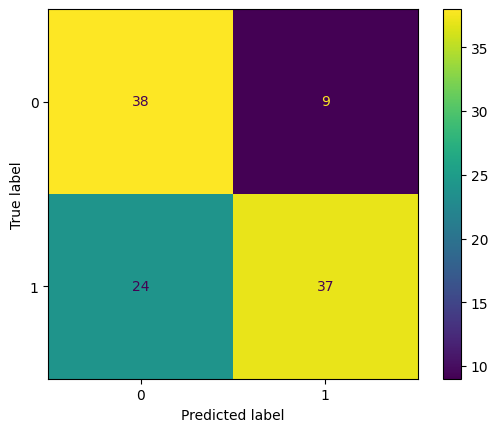

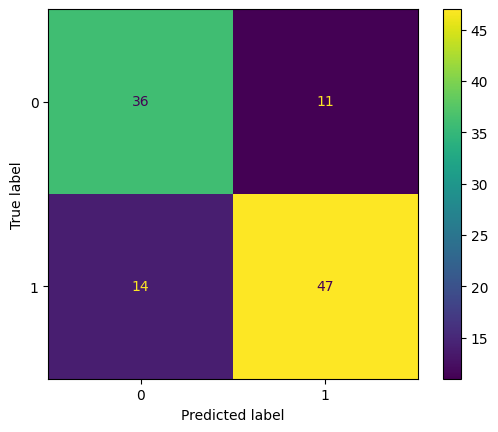

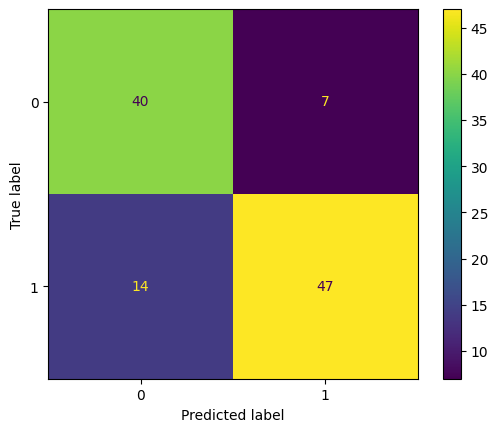

In [42]:
plot_confusion_matrix(modelLogistic, XTest, yTest)
plot_confusion_matrix(modelKnn, XTest, yTest)
plot_confusion_matrix(modelDT, XTest, yTest)
print("Árvore de Decisão > KNN > Logística")